# Super Fun with Bayesian Magic
> Let's reverse engineer a superannuation fund, because I'm bored in lockdown.

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian, Finance]
- image: images/22-3-2020-Super-Fun-With-Bayesian-Magic/australian-money-money-note-notes-529875.jpg

In Australia, there have been a number of radical fiscal proposals to fight the economic impacts of COV19.
One of these is to allow "Casual" workers (Those without paid leave entitlements) to withdraw money from their Superannuation account. It's a radical proposal, and one of my friends wanted to understand more about the impacts that this would have. 

Their exact question was:
> "I want to know what you would estimate the balance of young people to be (Under the age of 34)"

> Note: Superannuation is a type of pension savings account in Australia, where 9.5% (or more) of an employees gross salary is contributed by an employer to an employees account. The account is usually only avalible to the employee when they retire at age 65. While employees have an individual fund, investment decisions are made by a fund manager. With \\$1.5 Trillion USD of total assets, and 15M members, the scheme has an average balance of \\$100,000 USD per member.

Let's do some analysis, to try and understand more about what the balance of a typical member, in different age and gender brackets looks like. 

I'm focussing on a Superannuation fund called *Hostplus* who describe themselves as follows: 
> "Hostplus is the industry fund for those that live and love Australian hospitality, tourism, recreation and sport".

IE, It's highly likely that many of their members are casual, and will be impacted by this new policy.


Now for some data, I'm pulling it from [here](https://www.apra.gov.au/annual-fund-level-superannuation-statistics)

|              | Number of member accounts | Fund percentage | Average percentage across all funds |
|--------------|---------------------------|-----------------|-------------------------------------|
| Below age 25 |                           |                 |                                     |
| - Male       | 137,531                   | 12              | 5                                   |
| - Female     | 121,298                   | 10              | 6                                   |
| Age 25-34    |                           |                 |                                     |
| - Male       | 211,192                   | 18              | 11                                  |
| - Female     | 197,421                   | 17              | 12                                  |
| Age 35-44    |                           |                 |                                     |
| - Male       | 126,284                   | 11              | 10                                  |
| - Female     | 118,578                   | 10              | 12                                  |

[Source 1 ](https://www.superannuation.asn.au/ArticleDocuments/359/1710_Superannuation_account_balances_by_age_and_gender.pdf.aspx)




So the great news is that the data we need is provided by an Australian goverment body called APRA, and can be found [here](https://www.apra.gov.au/sites/default/files/Annual%20Fund-level%20Superannuation%20Statistics%20June%202019.xlsx)

In particualr, we are interested in the demographic data which can be found on tab 12. 

Ok, so I've taken the data, and filtered out some of the blank rows, and columns which are redundant. 


In [1]:
import pandas as pd

df = pd.read_csv('data/22-3-2020-Super-Fun-With-Bayesian-Magic/superannuation_demographic_data.csv',
                 sep=';',header=2,skiprows=[3],na_values='*',thousands='\xa0')
display(df)

,Fund name,RSE Regulatory classification,Fund type,RSE Membership base,Fund's RSE licensee,RSE licensee ownership type,RSE licensee profit status,Total number of member accounts at the end of period,Total members' benefits at end of period,Number of members accounts : female,...,35 to 44.3,45 to 49.3,50 to 54.3,55 to 59.3,60 to 64.3,65 to 69.3,70 to 74.3,75 to 84.3,85+.3,Age not available.3
0,Advance Retirement Suite,Public offer,Retail,General base,BT Funds Management Limited,Financial services corporation ownership,For profit status,4257.0,242016.0,2022.0,...,5067.0,16385.0,25337.0,33835.0,24265.0,14105.0,8389.0,8522.0,2115.0,NaN
1,Alcoa of Australia Retirement Plan,Non public offer,Corporate,Corporate base,Alcoa of Australia Retirement Plan Pty Ltd,Employer sponsor (non-public sector) ownership,Not for profit status,5575.0,2110399.0,943.0,...,144855.0,199498.0,316700.0,496428.0,368924.0,180194.0,90768.0,NaN,NaN,NaN
2,AMG Super,Public offer,Retail,General base,Equity Trustees Superannuation Limited,Financial services corporation ownership,For profit status,26631.0,1207910.0,16401.0,...,133919.0,73901.0,77101.0,74967.0,80670.0,80669.0,46792.0,38600.0,6737.0,NaN
3,AMP Eligible Rollover Fund,Public offer,Retail - ERF,General base,AMP Superannuation Limited,Financial services corporation ownership,For profit status,344498.0,1314606.0,144799.0,...,123236.0,146850.0,144130.0,157326.0,120133.0,80376.0,21719.0,6162.0,1443.0,2805.0
4,AMP Retirement Trust,Public offer,Retail,General base,AMP Superannuation Limited,Financial services corporation ownership,For profit status,290026.0,16657866.0,122790.0,...,1250362.0,892699.0,958048.0,1239739.0,1869105.0,1726314.0,1272513.0,553326.0,29868.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,WA Local Government Superannuation Plan,Public offer,Public Sector,Government base,WA Local Government Superannuation Plan Pty Ltd,Nominating organisation ownership,Not for profit status,56398.0,3916275.0,NaN,...,329344.0,286557.0,355739.0,411157.0,384366.0,252799.0,134972.0,NaN,NaN,NaN
167,Wealth Personal Superannuation and Pension Fund,Public offer,Retail,General base,N. M. Superannuation Proprietary Limited,Financial services corporation ownership,For profit status,307147.0,45164907.0,NaN,...,1962911.0,1799016.0,2251413.0,3384014.0,5086797.0,5072506.0,3528669.0,2495078.0,218762.0,NaN
168,Westpac Mastertrust - Superannuation Division,Public offer,Retail,General base,Westpac Securities Administration Limited,Financial services corporation ownership,For profit status,193312.0,6293890.0,78447.0,...,1042664.0,632065.0,575985.0,527562.0,366485.0,162305.0,85684.0,96966.0,19493.0,NaN
169,Westpac Personal Superannuation Fund,Public offer,Retail,General base,Westpac Securities Administration Limited,Financial services corporation ownership,For profit status,41166.0,367925.0,16487.0,...,4435.0,24258.0,46543.0,68753.0,60941.0,32357.0,15916.0,NaN,NaN,NaN


In [2]:
hostplus_row = df[df['Fund name'] == 'HOSTPLUS Superannuation Fund']
display(hostplus_row)

,Fund name,RSE Regulatory classification,Fund type,RSE Membership base,Fund's RSE licensee,RSE licensee ownership type,RSE licensee profit status,Total number of member accounts at the end of period,Total members' benefits at end of period,Number of members accounts : female,...,35 to 44.3,45 to 49.3,50 to 54.3,55 to 59.3,60 to 64.3,65 to 69.3,70 to 74.3,75 to 84.3,85+.3,Age not available.3
65,HOSTPLUS Superannuation Fund,Public offer,Industry,Industry base,Host-Plus Pty. Limited,Nominating organisation ownership,Not for profit status,1193243.0,44680088.0,612812.0,...,7034224.0,3394575.0,2750257.0,2490451.0,1843587.0,1008357.0,409016.0,165163.0,NaN,NaN


In [3]:
hostplus_row.columns

Index(['Fund name', 'RSE Regulatory classification', 'Fund type',
       'RSE Membership base', 'Fund's RSE licensee',
       'RSE licensee ownership type', 'RSE licensee profit status',
       'Total number of member accounts at the end of period',
       'Total members' benefits at end of period',
       'Number of members accounts : female',
       'Number of members accounts : male',
       'Number of members : Intersex or Indeterminate',
       'Number of members : Not stated or inadequately described',
       'Members' benefits : female', 'Members' benefits : male',
       'Members' benefits : Intersex or Indeterminate',
       'Members' benefits : Not stated or inadequately described', '<25',
       '25 to 34', '35 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64',
       '65 to 69', '70 to 74', '75 to 84', '85+', 'Age not available', '<25.1',
       '25 to 34.1', '35 to 44.1', '45 to 49.1', '50 to 54.1', '55 to 59.1',
       '60 to 64.1', '65 to 69.1', '70 to 74.1', '75 to

Ok, Let's pull the data we need out of the Pandas dataframe. Please forgive me for this horrible horrible hack.

In [4]:
age_brackets = ['<25','25 to 34', '35 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64',
       '65 to 69', '70 to 74', '75 to 84', '85+']

members_f_numbers = hostplus_row[['<25','25 to 34', '35 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64',
       '65 to 69', '70 to 74', '75 to 84', '85+']].values.ravel()

members_m_numbers = hostplus_row[['<25.2', '25 to 34.2', '35 to 44.2','45 to 49.2', '50 to 54.2', '55 to 59.2',
        '60 to 64.2', '65 to 69.2','70 to 74.2', '75 to 84.2', '85+.2']].values.ravel()


#Total account balance is denominated in 1000's of dollars
members_f_total_account_balance = 1000*hostplus_row[['<25.1', '25 to 34.1', '35 to 44.1', '45 to 49.1', '50 to 54.1',
        '55 to 59.1','60 to 64.1', '65 to 69.1', '70 to 74.1', '75 to 84.1', '85+.1']].values.ravel()

members_m_total_account_balance = 1000*hostplus_row[['<25.3', '25 to 34.3', '35 to 44.3', '45 to 49.3', '50 to 54.3',
        '55 to 59.3', '60 to 64.3', '65 to 69.3', '70 to 74.3', '75 to 84.3', '85+.3',]].values.ravel()


Now we have the data, let's do a quick, visualization of ages of HOSTPLUS's members.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

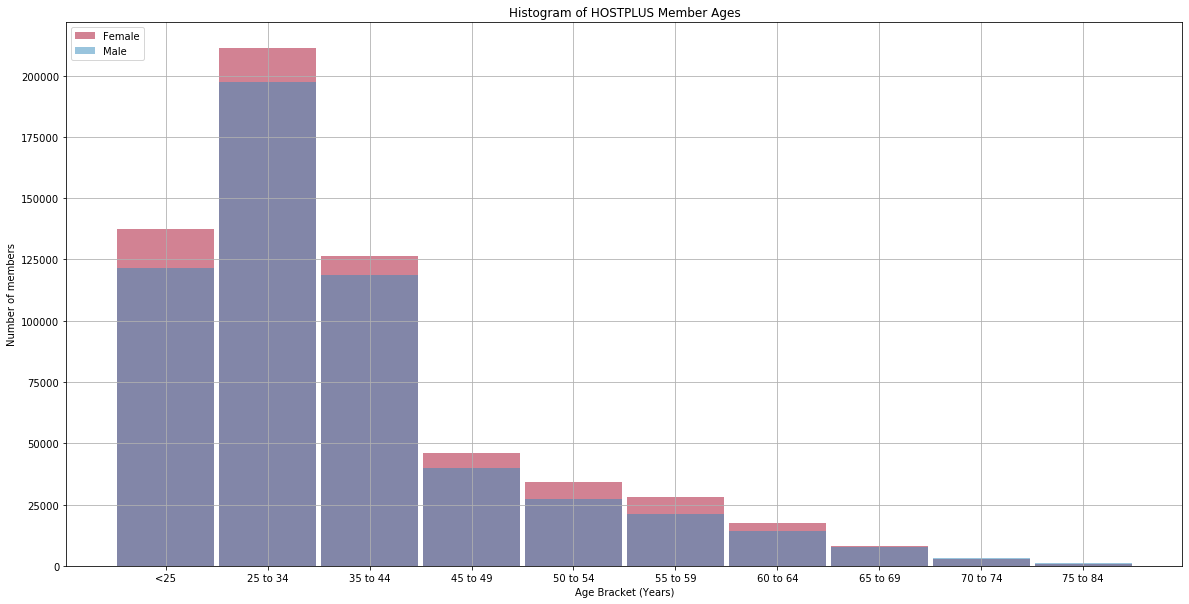

In [6]:
plt.bar(age_brackets,members_f_numbers,label='Female',alpha=0.5,width=0.95,color='#A60628')
plt.bar(age_brackets,members_m_numbers,label='Male',alpha=0.5,width=0.95,color='#348ABD')

plt.grid()
plt.legend()
plt.title('Histogram of HOSTPLUS Member Ages')
plt.ylabel('Number of members')
plt.xlabel('Age Bracket (Years)')
plt.show()

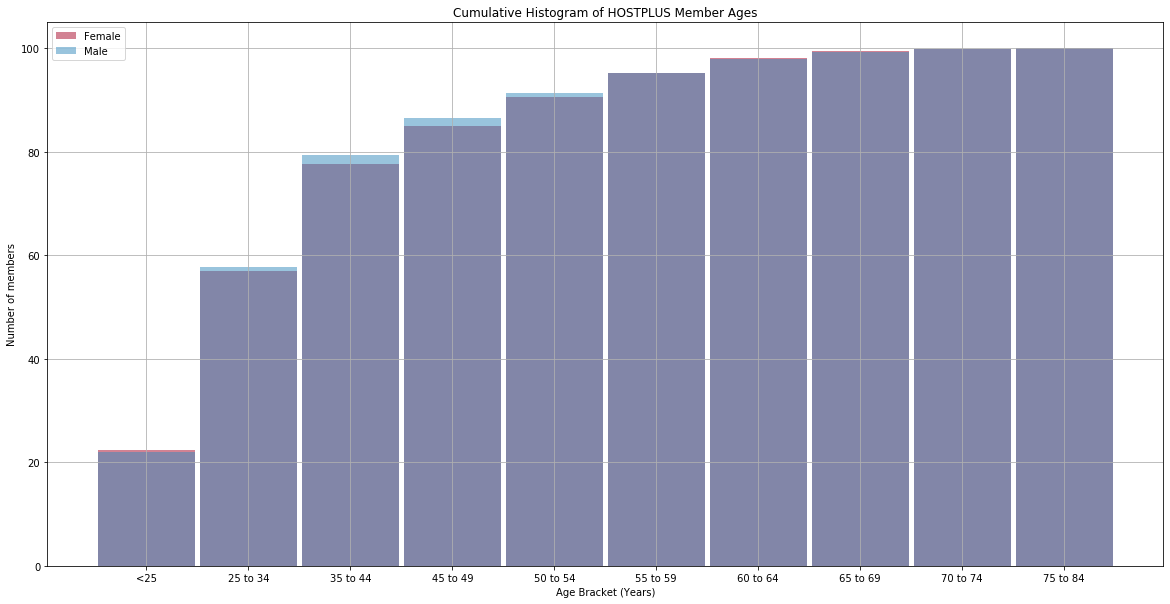

In [7]:
plt.bar(age_brackets,100*np.cumsum(members_f_numbers)/np.nansum(members_f_numbers),label='Female',alpha=0.5,width=0.95,color='#A60628')
plt.bar(age_brackets,100*np.cumsum(members_m_numbers)/np.nansum(members_m_numbers),label='Male',alpha=0.5,width=0.95,color='#348ABD')

plt.grid()
plt.legend()
plt.title('Cumulative Histogram of HOSTPLUS Member Ages')
plt.ylabel('Number of members')
plt.xlabel('Age Bracket (Years)')
plt.show()

Ok, so from this, it's clear that a typical member is in the range of 25-34 years old, with slightly more women than men. Now let's look at the account balances.

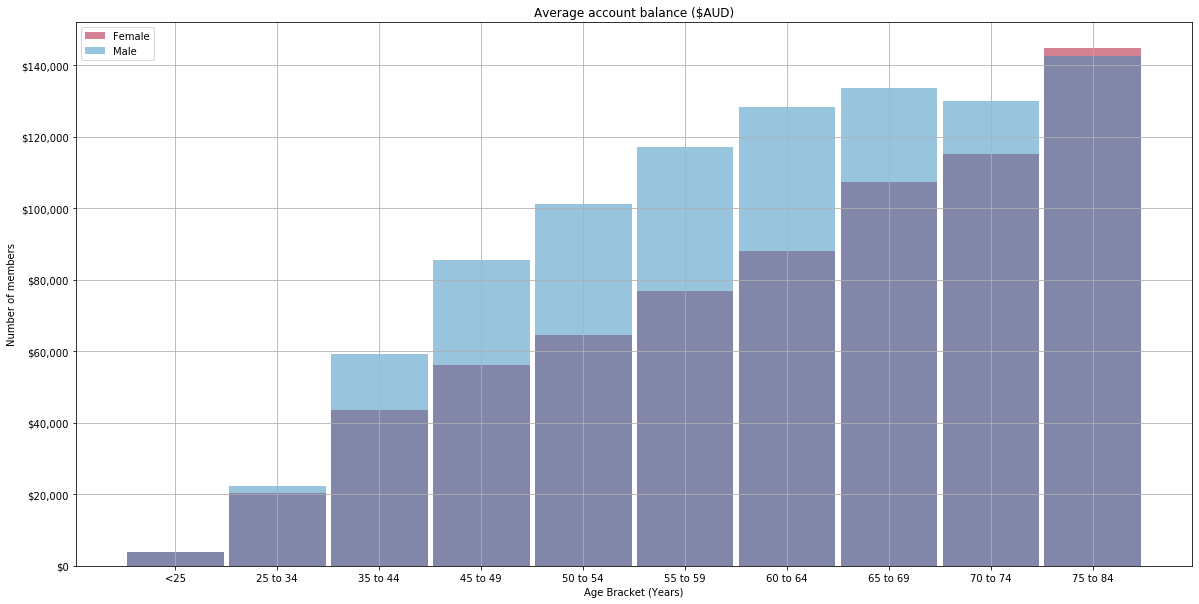

In [11]:
members_f_average_account_balance = members_f_total_account_balance/members_f_numbers
members_m_average_account_balance = members_m_total_account_balance/members_m_numbers

plt.bar(age_brackets,members_f_average_account_balance,label='Female',alpha=0.5,width=0.95,color='#A60628')
plt.bar(age_brackets,members_m_average_account_balance,label='Male',alpha=0.5,width=0.95,color='#348ABD')

plt.grid()
plt.legend()
plt.title('HOSTPLUS average account balance vs age')
plt.ylabel('Average account balance ($AUD)')
plt.xlabel('Age Bracket (Years)')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.show()